# House Rent Prediction

****Predicting house  rent prices in every location for buyers it should be easy and convinient to find rental houses

# ******About Dataset**

****Housing in India varies from palaces of erstwhile maharajas to modern apartment buildings in big cities to tiny huts in far-flung villages. There has been tremendous growth in India's housing sector as incomes have risen. The Human Rights Measurement Initiative finds that India is doing 60.9% of what should be possible at its level of income for the right to housing.

Renting, also known as hiring or letting, is an agreement where a payment is made for the temporary use of a good, service, or property owned by another. A gross lease is when the tenant pays a flat rental amount and the landlord pays for all property charges regularly incurred by the ownership. Renting can be an example of the sharing economy.**

**

# dataset

Rent of a housing property depends on a lot of factors like:

number of bedrooms,
hall, and
kitchen
size of the property
the floor of the house
area type
area locality
City
furnishing status of the house

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge,Lasso
from sklearn import model_selection
from sklearn.linear_model import RidgeCV,LassoCV

# Data Undestanding

In [2]:
hrp = pd.read_csv("/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv")


 Top 5 rows

In [3]:
hrp = pd.read_csv("/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv")
hrp.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


last 5 rows

In [4]:
hrp.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [5]:
hrp.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [6]:
hrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB



Datatypes of each column

In [7]:
hrp.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [8]:
hrp.shape

(4746, 12)

In [9]:
hrp["Floor"].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

In [10]:
hrp["Area Locality"].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [11]:
hrp["Area Type"].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [12]:
hrp["City"].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [13]:
hrp["Tenant Preferred"].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [14]:
hrp["Furnishing Status"].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [15]:
hrp["Point of Contact"].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

To chek null values are present or not

In [16]:
hrp.isna()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,False,False,False,False,False,False,False,False,False,False,False,False
4742,False,False,False,False,False,False,False,False,False,False,False,False
4743,False,False,False,False,False,False,False,False,False,False,False,False
4744,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
hrp.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [18]:
hrp['Area Locality'].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

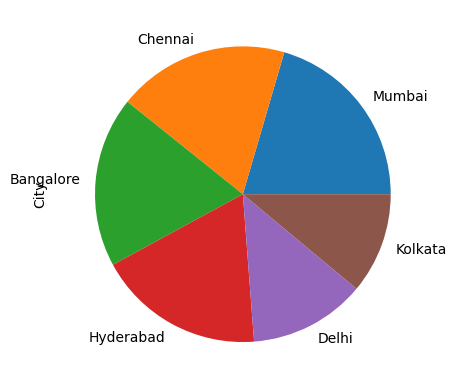

In [19]:
hrp['City'].value_counts().plot.pie();

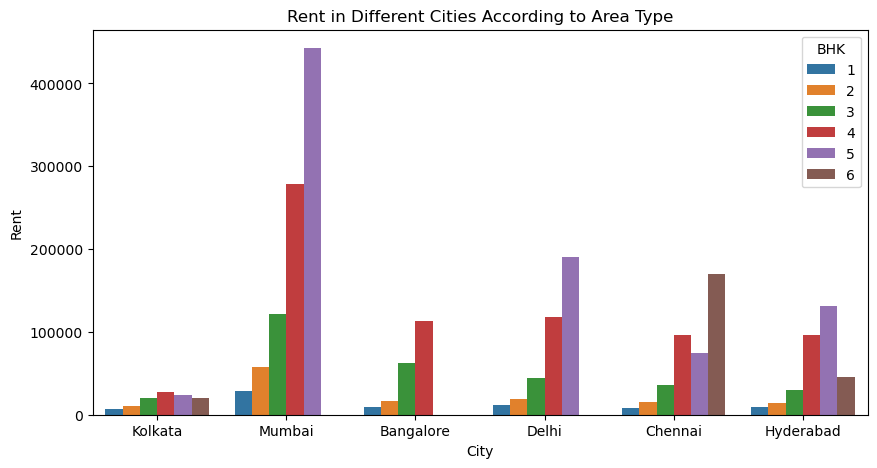

In [20]:
plt.figure(figsize=(10,5))

#Add title
plt.title("Rent in Different Cities According to Area Type")

sns.barplot(x=hrp["City"], y=hrp["Rent"], hue=hrp["BHK"], errorbar=None)

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


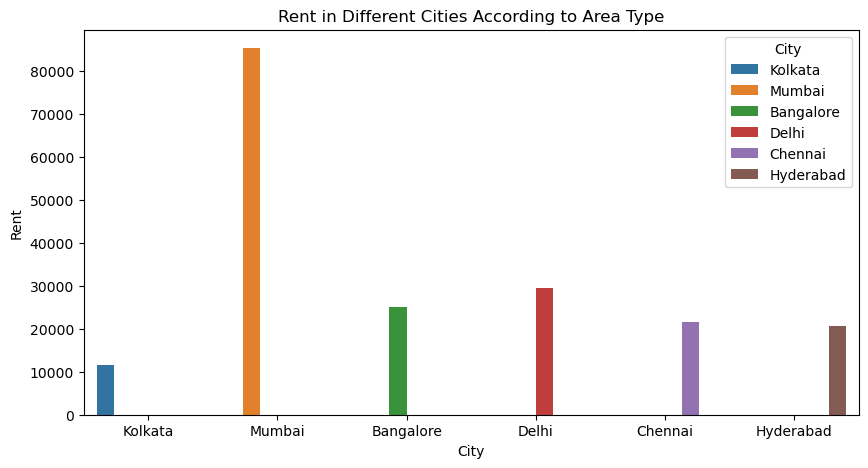

In [21]:
plt.figure(figsize=(10,5))

#Add title
plt.title("Rent in Different Cities According to Area Type")

sns.barplot(x=hrp["City"], y=hrp["Rent"], hue=hrp["City"], ci=None)

plt.show()

# Data preperation

# Correlation  matrix

It is a statistical technique used to evaluate  the relationship between  two variables in a data set. It shows relationship like
positive relationship,negative relationship and no relationship.Here will check correlation matrix with each variable and will find which is  the positive relationship 

In [22]:
hrp.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


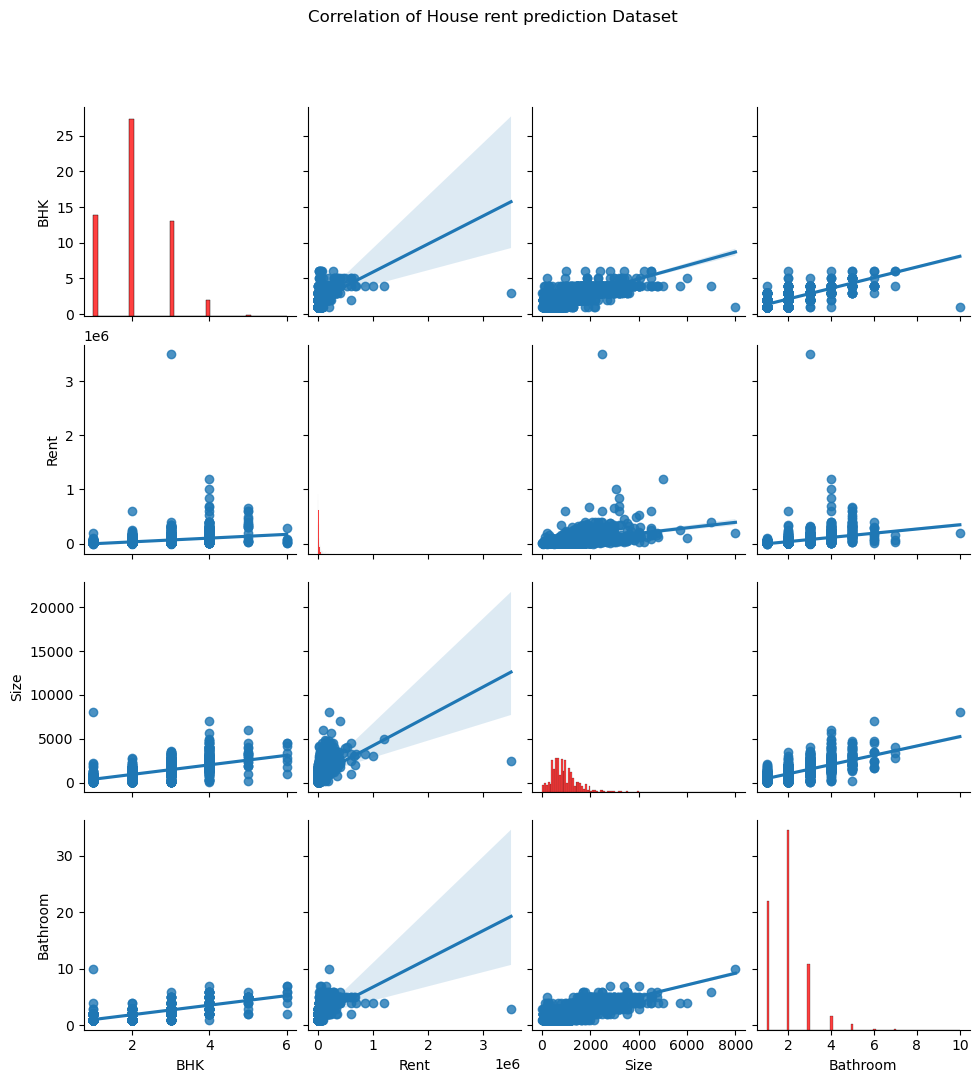

In [23]:
g= sns.pairplot(hrp,kind="reg",diag_kws= {'color': 'red'})

g.fig.suptitle("Correlation of House rent prediction Dataset", y=1.08)

plt.show()

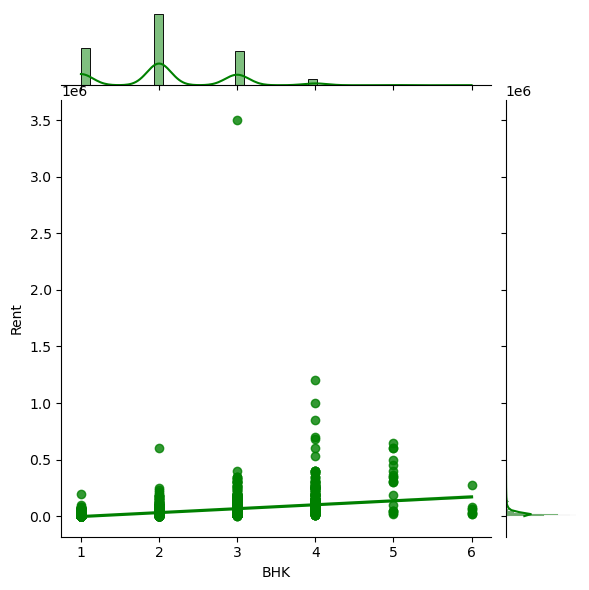

In [24]:
sns.jointplot(x="BHK", y="Rent",data=hrp,kind="reg",color="green")

plt.show()

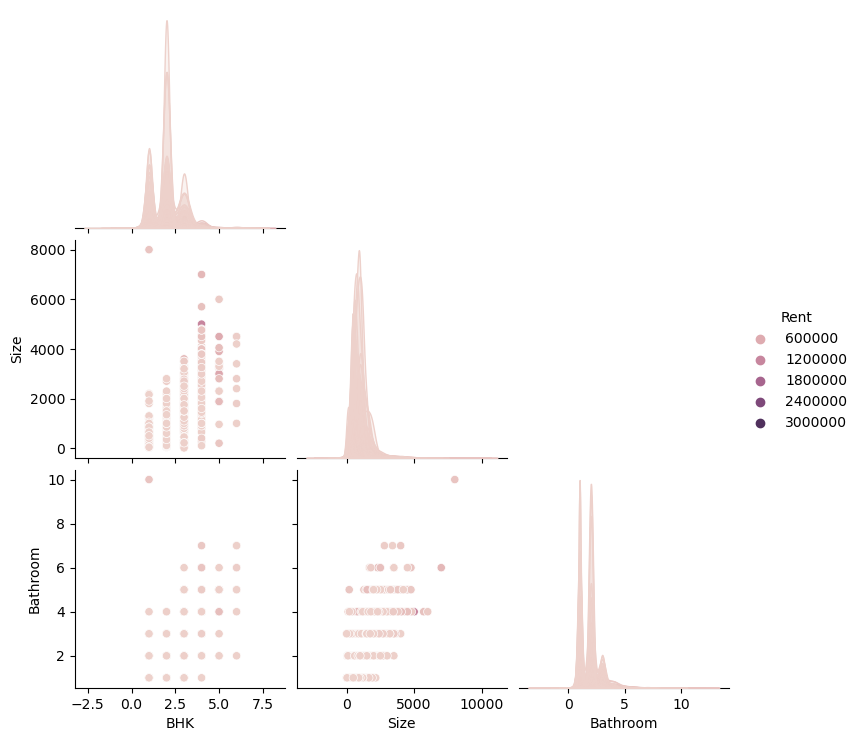

In [25]:
import seaborn as sns
sns.pairplot(hrp,hue='Rent',corner=True);

# Here BHK (X)is  independent variable

In [26]:
X = hrp.BHK
X = sm.add_constant(X) # It will add a constant to X.
X.head()

,const,BHK
0,1.0,2
1,1.0,2
2,1.0,2
3,1.0,2
4,1.0,2


# Here y is dependent variable which is Rent 

In [27]:
y = hrp.Rent 

In [28]:
slr = sm.OLS(y,X)
model = slr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     751.1
Date:                Fri, 12 May 2023   Prob (F-statistic):          1.21e-153
Time:                        07:21:58   Log-Likelihood:                -59853.
No. Observations:                4746   AIC:                         1.197e+05
Df Residuals:                    4744   BIC:                         1.197e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.731e+04   2840.791    -13.134      0.000   -4.29e+04   -3.17e+04
BHK          3.47e+04   1266.020     27.407      0.000    3.22e+04    3.72e+04
==============================================================================
Omnibus:                    11523.724   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        230160879.095
Skew:                          24.832   Prob(JB):                         0.00
Kurtosis:                    1080.697   Cond. No.                         7.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model.params

const   -37311.570907
BHK      34697.637566
dtype: float64

In [30]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-3.731e+04,2840.791,-13.134,0.000,-4.29e+04,-3.17e+04
BHK,3.47e+04,1266.020,27.407,0.000,3.22e+04,3.72e+04


In [31]:
model.f_pvalue


1.2069419479977923e-153

In [32]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [33]:
model.fvalue

751.1361165157098

In [34]:
model.conf_int()

,0,1
const,-42880.840363,-31742.301451
BHK,32215.650621,37179.624511


In [35]:
model.f_pvalue

1.2069419479977923e-153

In [36]:
model.tvalues

const   -13.134218
BHK      27.406863
dtype: float64

In [37]:
model.mse_model

3956851877351.9023

In [38]:
model.rsquared

0.1366910847318521

In [39]:
model.rsquared_adj

0.13650910561817842

In [40]:
model.fittedvalues[ :5]

0    32083.704224
1    32083.704224
2    32083.704224
3    32083.704224
4    32083.704224
dtype: float64

In [41]:
y[ :5]

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent, dtype: int64

In [42]:
print("Rent: " , model.params[0] , "+ (BHK*",model.params[1],")")

Rent:  -37311.57090739812 + (BHK* 34697.63756587568 )


In [43]:
X = hrp[["BHK"]]
sm.add_constant(X)
y = hrp["Rent"]

In [44]:
lr = LinearRegression()
model = lr.fit(X,y)

In [45]:
model.coef_.item()

34697.63756587573

In [46]:
model.intercept_

-37311.57090739802

In [47]:
model.score(X,y)

0.13669108473185188

In [48]:
model.predict(X)[:10]

array([32083.70422435, 32083.70422435, 32083.70422435, 32083.70422435,
       32083.70422435, 32083.70422435, 32083.70422435, -2613.93334152,
       32083.70422435, 32083.70422435])

In [49]:
model.predict([[20]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([656641.18041012])

In [50]:
model.predict([[110],[2000],[3200]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3.77942856e+06, 6.93579636e+07, 1.10995129e+08])

Residuals.



In [51]:
slr = sm.OLS(y,X) 
model = slr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Rent   R-squared (uncentered):                   0.255
Model:                            OLS   Adj. R-squared (uncentered):              0.255
Method:                 Least Squares   F-statistic:                              1623.
Date:                Fri, 12 May 2023   Prob (F-statistic):                   1.59e-305
Time:                        07:21:58   Log-Likelihood:                         -59937.
No. Observations:                4746   AIC:                                  1.199e+05
Df Residuals:                    4745   BIC:                                  1.199e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BHK         1.926e+04    477.929     40.289      0.000    1.83e+04    2.02e+04
==============================================================================
Omnibus:                    11447.067   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        211690289.336
Skew:                          24.447   Prob(JB):                         0.00
Kurtosis:                    1036.491   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
mean_square = mean_squared_error(y,model.fittedvalues)
mean_square

5457077684.029318

In [53]:
rmse = np.sqrt(mean_square)
rmse

73872.03587305089

In [54]:
results = pd.DataFrame({"Real": y, "Prediction": model.predict(X),
                        "Residuals": y -(model.predict(X)),
                        "Square of Residuals": (y -(model.predict(X)))**2})

In [55]:
results.head(10)

,Real,Prediction,Residuals,Square of Residuals
0,10000,38510.488031,-28510.488031,8.128479e+08
1,20000,38510.488031,-18510.488031,3.426382e+08
2,17000,38510.488031,-21510.488031,4.627011e+08
3,10000,38510.488031,-28510.488031,8.128479e+08
4,7500,38510.488031,-31010.488031,9.616504e+08
5,7000,38510.488031,-31510.488031,9.929109e+08
6,10000,38510.488031,-28510.488031,8.128479e+08
7,5000,19255.244016,-14255.244016,2.032120e+08
8,26000,38510.488031,-12510.488031,1.565123e+08
9,10000,38510.488031,-28510.488031,8.128479e+08


In [56]:
np.sum(results["Square of Residuals"])

25899290688403.145

In [57]:
np.mean(results["Square of Residuals"])

5457077684.029318

In [58]:
model.resid[:10]

0   -28510.488031
1   -18510.488031
2   -21510.488031
3   -28510.488031
4   -31010.488031
5   -31510.488031
6   -28510.488031
7   -14255.244016
8   -12510.488031
9   -28510.488031
dtype: float64

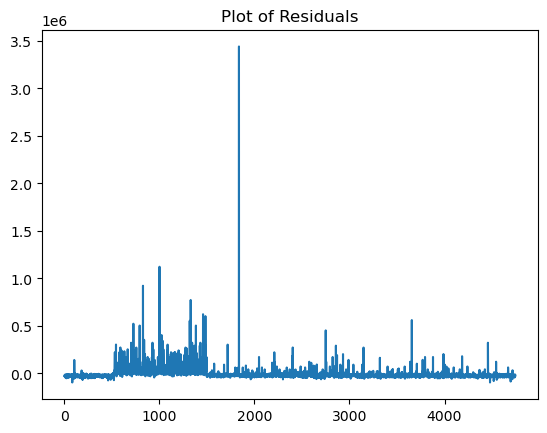

In [59]:
plt.plot(model.resid)
plt.title("Plot of Residuals")
plt.show()

# **MULTIPLE REGRESSION**

In [60]:
hrp = pd.read_csv("/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv")

hrp = hrp[['BHK', 'Rent', 'Size', 'Bathroom']]
hrp.head()

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1
4,2,7500,850,1


In [61]:
hrp.shape

(4746, 4)

In [62]:
X = hrp.drop('Rent',axis=1)
X.head()

,BHK,Size,Bathroom
0,2,1100,2
1,2,800,1
2,2,1000,1
3,2,800,1
4,2,850,1


In [63]:
y = hrp["Rent"]
y[:5]

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent, dtype: int64

In [64]:
hrp.shape

(4746, 4)

In [65]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)
X_train

,BHK,Size,Bathroom
1925,2,1000,2
4374,3,1838,3
2441,4,2100,4
3158,2,1200,2
3132,3,2300,3
...,...,...,...
388,2,320,1
1908,3,1480,2
2612,2,75,1
85,1,435,1


In [66]:
lr.fit(X_train,y_train)

LinearRegression()

In [67]:
lr.predict(X_test)

array([ 4.30731985e+04, -7.50992270e+03,  3.20969713e+04,  2.52368292e+04,
        4.30731985e+04,  4.03291417e+04,  3.41550139e+04, -6.77467446e+03,
        2.39253291e+04, -4.07985168e+03,  3.69483047e+04,  3.63502593e+04,
        3.08072645e+04,  2.09427614e+03,  2.90454211e+04,  3.46630454e+03,
        3.45666224e+04, -6.13789429e+03,  4.30731985e+04, -9.24186353e+02,
        8.13080640e+04, -2.65858924e+03,  3.48410281e+04,  1.26141679e+04,
       -2.73526385e+03,  1.78293186e+05, -2.65858924e+03,  3.43470978e+04,
        4.30731985e+04, -3.39383748e+03,  3.69483047e+04,  4.20155278e+03,
        3.20969713e+04,  3.59112102e+04,  8.20715801e+02, -5.40264605e+03,
        3.20969713e+04, -1.56436251e+04,  8.26800924e+04,  4.30731985e+04,
        6.94560959e+03, -1.56928591e+04,  3.75850849e+04,  3.48410281e+04,
        4.44452269e+04,  3.20969713e+04, -2.02180908e+03,  4.03291417e+04,
        3.20969713e+04,  4.20155278e+03, -2.02180908e+03,  1.22025594e+04,
       -6.49780672e+02,  

In [68]:
lr.score(X_test,y_test)

0.3631479131138301

In [69]:
X_train = X.iloc[:3718]
X_test = X.iloc[3718:]
y_train = y[:3718]
y_test = y[3718:]

In [70]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (3718, 3)
X_test Shape:  (1028, 3)
y_train Shape:  (3718,)
y_test Shape:  (1028,)


In [71]:
sm.add_constant(X_train)
mlr = sm.OLS(y_train,X_train)
model = mlr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Rent   R-squared (uncentered):                   0.341
Model:                            OLS   Adj. R-squared (uncentered):              0.340
Method:                 Least Squares   F-statistic:                              640.4
Date:                Fri, 12 May 2023   Prob (F-statistic):                        0.00
Time:                        07:21:59   Log-Likelihood:                         -47115.
No. Observations:                3718   AIC:                                  9.424e+04
Df Residuals:                    3715   BIC:                                  9.425e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BHK        -2.183e+04   2324.181     -9.394      0.000   -2.64e+04   -1.73e+04
Size          44.2969      3.261     13.584      0.000      37.903      50.691
Bathroom    2.577e+04   2462.192     10.466      0.000    2.09e+04    3.06e+04
==============================================================================
Omnibus:                     9064.003   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        162817296.412
Skew:                          24.996   Prob(JB):                         0.00
Kurtosis:                    1026.963   Cond. No.                     2.73e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
mlr = LinearRegression()
model = mlr.fit(X_train,y_train)

In [73]:
print("Intercept of Model-Bias: ",model.intercept_)
print("Coefficients of Model: ",model.coef_)

Intercept of Model-Bias:  -45256.474732058414
Coefficients of Model:  [-5293.94913311    35.9811381  32449.79383998]


In [74]:
print("Sales:", model.intercept_ ," + ",
      model.coef_[0],"* BHK+",
      model.coef_[1],"* Size +",
      model.coef_[2],"* Bathroom++3")

Sales: -45256.474732058414  +  -5293.9491331134195 * BHK+ 35.98113809567292 * Size + 32449.793839983027 * Bathroom++3


In [75]:
model.predict(pd.DataFrame([[35],[20],[45]]).T).item()

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


1230415.6511701217

In [76]:
train_root_mean_square = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

In [77]:
print("root_mean_square_error of Training Set: ",train_root_mean_square)

root_mean_square_error of Training Set:  75302.2910070139


In [78]:
test_root_mean_square = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

In [79]:
print("root_mean_square_error of Test Set: ",test_root_mean_square)

root_mean_square_error of Test Set:  48151.34932827659


# Model Tuning

In [80]:
X = hrp.drop("Rent",axis=1)
y = hrp["Rent"]

X_train = X.iloc[:3718]
X_test = X.iloc[3718:]
y_train = y[:3718]
y_test = y[3718:]

In [81]:
mlr = LinearRegression()
model = mlr.fit(X_train,y_train)

In [82]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

75302.2910070139

In [83]:
model.score(X_train,y_train)

0.2453893569102742

**Calculate validated r2 square**

In [84]:
cross_val_score(model,X_train,y_train,cv=20,scoring="r2").mean()

-0.9375545582962808

In [85]:
np.sqrt(-cross_val_score(model,X_train,y_train,cv=20,scoring="neg_mean_squared_error"))

array([ 24633.49286175,  25452.94275886,  34889.84560243,  62961.56383517,
        88388.42212556,  95248.36541681,  59134.00365722, 105091.93003838,
        35855.9782427 , 250056.85275326,  33046.13988429,  34540.45922135,
        36823.17867199,  25467.07677158,  41859.48653589,  36998.20670181,
        42078.03723057,  36543.57189513,  38208.45071702,  54796.59729306])

In [86]:
np.sqrt(-cross_val_score(model,X_train,y_train,cv=20,scoring="neg_mean_squared_error")).mean()

58103.73011074188

In [87]:
cross_val_score(model,X_test,y_test,cv=20,scoring="r2").mean()

0.48164448315248726

In [88]:
np.sqrt(-cross_val_score(model,X_test,y_test,cv=20,scoring="neg_mean_squared_error")).mean()

16331.079861741047

In [ ]:
##### print("Enter House Details to Predict Rent")
a = int(input("Number of BHK: "))
b = int(input("Size of the House: "))
c = int(input("Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): "))
d = int(input("Pin Code of the City: "))
e = int(input("Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): "))
f = int(input("Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): "))
g = int(input("Number of bathrooms: "))
features = np.array([[a, b, c, d, e, f, g]])
print("Predicted House Price = ", clf.predict(features))
print("Predicted House Price = ", model.predict(features))

Number of BHK:  5
Size of the House:  12
Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3):  23


# Conclusion


Here we predict the houses rents in different area,cities using regression we get the accurate rent prices